Many-Body Chern Number without Integration

Koji Kudo, Haruki Watanabe, Toshikaze Kariyado, and Yasuhiro Hatsugai

Phys. Rev. Lett. 122, 146601 – Published 9 April 2019

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.146601

In [36]:
using QuantumOptics
using NBInclude
@nbinclude("Lattice_Basis_Neighbors_Hops.ipynb"; regex=r"#.*executeme")
@nbinclude("QOJulia_utils.ipynb")
@nbinclude("Chern_utils.ipynb")

calc_all_states_H_mb (generic function with 1 method)

# Parameters

In [30]:
param_dict=Dict{}()

LL = [5, 5]
N = LL[1]*LL[2]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1]

param_dict["LL"] = LL
param_dict["vv_lattice"] = vv_lattice
param_dict["vv_basis"] = vv_basis

nb = 1
t=-1
p=1
q=5
ϕ=p/q
param_dict["gauge"] = "Landau"
param_dict["t"]=t
param_dict["ϕ"]=ϕ
θθ = [0, 0]
param_dict["θθ"]=θθ

sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);
param_dict["sites"] = sites
param_dict["site_coord"] = site_coord
param_dict["site_number"] = site_number;

pbc=true
param_dict["pbc"] = pbc;
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ];
neighbors_list = [ neighbors ];
param_dict["neighbors_list"] = neighbors_list;

N1 = 20
N2 = 20
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

param_dict["Tx"] = Tx;
param_dict["Ty"] = Ty;

# Single Particle

In [31]:
basis = NLevelBasis(N) 
param_dict["basis"] = basis;

In [32]:
param_dict["model_H1"] = get_Hofstadter_hamiltonian
H_T = get_Hofstadter_hamiltonian(param_dict);

H1 = get_sp_op(basis, H_T);

EE, UU = eigenstates(dense(H1));

### Single Particle Chern

In [33]:
param_dict["param_1"] = "Tx"
param_dict["param_2"] = "Ty"
EEA, UUA = calc_all_states_H1(param_dict);

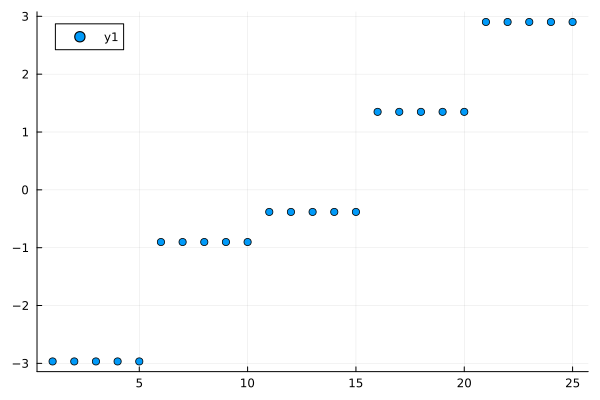

In [34]:
using Plots
scatter(real(EEA[1,1,:]))

In [40]:
bands = [[1,3],[4,6],[7,9]]
bands = [[1,5],[6,10],[11,15],[16,20],[21,25]]
Chern, F12list = calc_chern_bands(UUA, bands);
Chern

5-element Vector{Any}:
  0.9999999999999998 + 2.9099219531355976e-16im
  1.0000000000000002 + 3.0016888307938423e-16im
 -3.9999999999999996 - 5.454154317040941e-16im
  1.0000000000000002 + 2.328159222996824e-16im
  1.0000000000000004 + 1.1001100695711621e-16im

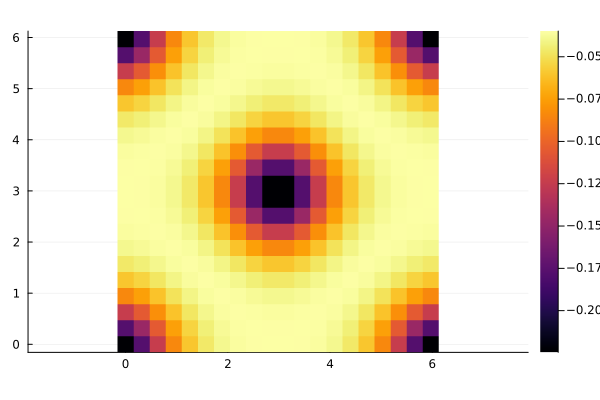

In [50]:
heatmap(Tx,Ty,imag(F12list[3]),aspect_ratio=1)

## Projected Single Particle

In [53]:
param_dict["sub_range"] = 1:5

sub_states = get_subset_states(H1, param_dict["sub_range"]);
subspace_proj, P, Pt = get_projector_op(basis, sub_states);
H1_proj = get_subspace_op(H1, P, Pt)
#param_dict["subspace_proj"] = subspace_proj
param_dict["projection"] = subspace_proj, P, Pt;

### Projected Single Particle Chern

In [54]:
EEA, UUA = calc_all_states_H1(param_dict);

In [56]:
bands = [[1,5]]
Chern, F12list = calc_chern_bands(UUA, bands);
Chern

1-element Vector{Any}:
 0.9999999999999998 + 2.9099219531355976e-16im

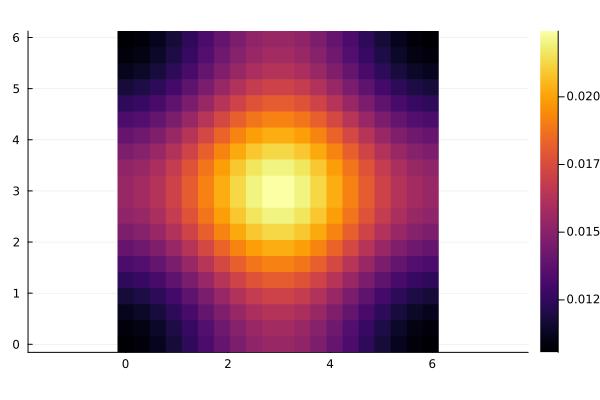

In [57]:
heatmap(Tx,Ty,imag(F12list[1]),aspect_ratio=1)

# Many Body

In [58]:
delete!(param_dict, "sub_range");

In [59]:
PN = 1
param_dict["PN"] = PN
basis_mb = get_basis_mb(param_dict)

ManyBody(onebodybasis=NLevel(N=25), states:25)

In [60]:
param_dict["basis_mb"]

ManyBody(onebodybasis=NLevel(N=25), states:25)

In [61]:
param_dict["dimH_mb"] = length(basis_mb)

25

## Non-Interacting Many Body

In [62]:
basis_mb.shape[1]

25

In [63]:
H1_mb = get_mb_op(basis_mb, H1);

In [64]:
EEA, UUA = calc_all_states_H_mb(param_dict);

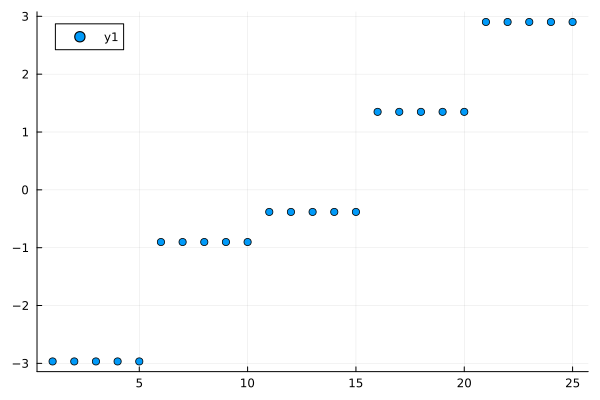

In [65]:
scatter(real(EEA[1,1,:]))

### Non-Interacting Many Body Chern

In [69]:
bands = [[1,6], [7,15], [16,24], [25,30], [31,39], [40,45]]
bands = [[1,5], [6,10], [11,15], [16,20], [21,25]]
Chern, F12list = calc_chern_bands(UUA, bands);
Chern

5-element Vector{Any}:
  0.9999999999999998 + 2.9099219531355976e-16im
  1.0000000000000002 + 3.0016888307938423e-16im
 -3.9999999999999996 - 5.454154317040941e-16im
  1.0000000000000002 + 2.328159222996824e-16im
  1.0000000000000004 + 1.1001100695711621e-16im

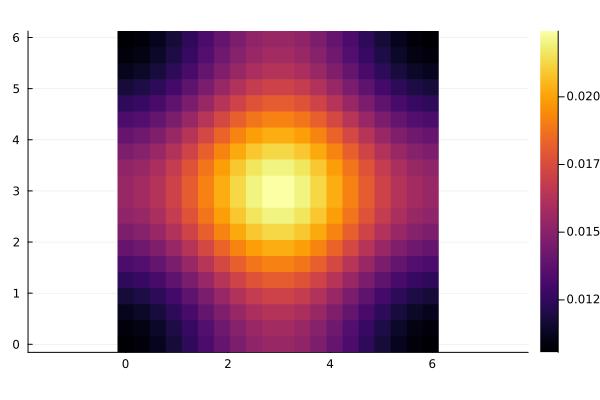

In [70]:
heatmap(Tx,Ty,imag(F12list[1]),aspect_ratio=1)

## Interacting Many Body

### Interacting Many Body Chern

# Projected Many Body

In [117]:
param_dict["sub_range"] = 1:11;

In [118]:
param_dict["θθ"] = [0, 0];

In [119]:
H_T = get_Hofstadter_hamiltonian(param_dict);
H1 = get_sp_op(basis, H_T);
sub_states = get_subset_states(H1, param_dict["sub_range"])

subspace_proj, P, Pt = get_projector_op(basis, sub_states);
param_dict["projection"] = subspace_proj, P, Pt;

In [120]:
PN = 1
param_dict["PN"] = PN
basis_mb_chern = get_basis_mb(param_dict);
param_dict["basis_mb"] = basis_mb_chern

ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=25), states:11), states:11)

In [121]:
param_dict["dimH_mb"] = length(basis_mb_chern)

11

## Projected Non-Interacting Many Body

In [122]:
EEA, UUA = calc_all_states_H_mb(param_dict);

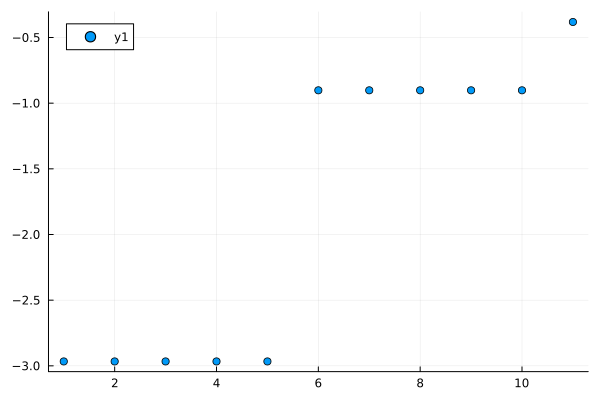

In [123]:
scatter(EEA[1,1,:])#, ylimits=(-6,-4))

### Projected Many Body Chern

In [124]:
#bands = [[1,6], [7,15], [16,21]]
#bands = [[1,3], [4,6]]
#bands = [[1,3]]
bands = [[1,5],[6,10],[11,15]]
bands = [[1,5]]
Chern, F12list = calc_chern_bands(UUA, bands);
Chern

1-element Vector{Any}:
 1.0000000000000002 - 1.8745571697961324e-16im

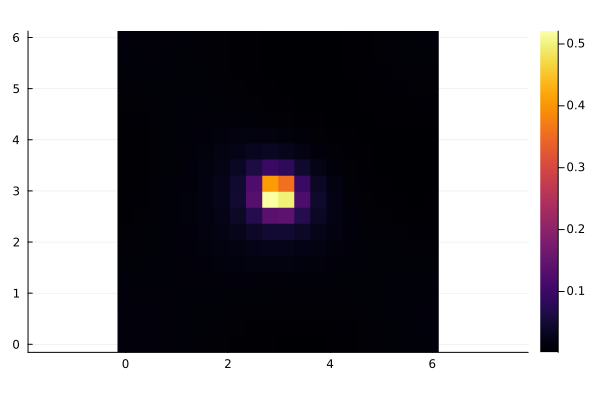

In [125]:
heatmap(Tx,Ty,imag(F12list[1]),aspect_ratio=1)